Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech </a>.

<div class="jumbotron">
  <h1 class="display-4">Password Checking with bcrypt library</h1>
  <p class="lead">Password hashing and salting is the recommended procedure to store and check passwords. In this section, we will explore how to implement a user authentication system in Python.</p>
  <hr>
  <h3 class="display-6"> Contents </h3>

  <ul style="list-style-type:none">
    <li> <a href="#Store-Passwords"> &#10070; How to Store Passwords </a> </li>
    <li> <a href="#bcrypt-library"> &#10070; bcrypt Library </a> </li>    
    <li> <a href="#Store-Encrypted-Passwords"> &#10070; Store Encrypted Passwords </a> </li>           
  </ul>
   

</div>



<hr>

<div class="alert alert-secondary" id="Store-Passwords">    
    <span class="topic"> &#10070; How to Store Passwords</span>   
</div>

Let's build a simple Login system that lets users use a program securely. We are just focussed on the login and sign-up part and specifically, how passwords are stored and retrieved.

In [ ]:
import getpass
import sqlite3

# Create database if it does not exist.
# Otherwise get a connection to the databse
try:
    conn = sqlite3.connect("users.db")
    
    # Create table. 
    cursor = conn.execute('''CREATE TABLE users (
                                user_id  VARCHAR(20),
                                password VARCHAR(100))''')
except Exception as e:
    # If table already exists, don't exit. 
    # Proceed to the loop 
    if (str(e) == "table users already exists"):
        pass
    # If table could not be created, something wrong
    # with database. Quit
    else:
        print("Could not create table")
        print(e)
        conn.close()
        quit()


while True:
    try:
        print("#################################################")
        print("#   1 - Login")
        print("#   2 - Signup")
        print("#   3 - Exit")
        print("#################################################")
        user_input = input("Enter option -> ")
        user_input = str(user_input)
        if user_input == "3":
            break
        elif user_input == "1":
            user_id = input("User id : ")
            password = getpass.getpass(prompt="Password :")
            cursor = conn.execute('''SELECT * FROM users
                            WHERE user_id = ?''', [user_id])
            # no execution happens until this is called or the cursor is iterated over
            row = cursor.fetchone()
            if row == None:
                print("user id does not exist.")
            else:
                if row[1] == password:
                    print("logged in")
                else:
                    print("password mismatch")

            # Check if the user id exists

        elif user_input == "2":
            user_id = input("User id : ")
            password = getpass.getpass(prompt="Password :")
            password_repeat = getpass.getpass(prompt="Repeat Password :")
            if password != password_repeat:
                print("Passwords do not match")
            else:
                try:
                    # Create new user

                    # step 1 - check if the user already exists
                    cursor = conn.execute('''SELECT * FROM users
                                             WHERE user_id = ?''', [user_id])

                    # no execution happens until this is called or the cursor is iterated over
                    row = cursor.fetchone()

                    # step 2 - if the user already exists, send message
                    if row != None:
                        print("user id already exists. Choose a different user id")

                    # step 3 - create user
                    else:
                        cursor = conn.execute('''INSERT INTO users (user_id, password) 
                                                    VALUES (?,?)''', [user_id, password])
                        conn.commit()
                        print(f"user {user_id} created ")
                except Exception as e:
                    print(e)
    except Exception as e:
        print(e)

# Close the connection after the program is done.
conn.close()


Could not create table
table users already exists
#################################################
#   1 - Login
#   2 - Signup
#   3 - Exit
#################################################


Enter option ->  2
User id :  john
Password : ········
Repeat Password : ········


user john created 
#################################################
#   1 - Login
#   2 - Signup
#   3 - Exit
#################################################


Enter option ->  1
User id :  john
Password : ········


logged in
#################################################
#   1 - Login
#   2 - Signup
#   3 - Exit
#################################################


There is one main problem with storing passwords in plain text in the database. If the database gets stolen, all the user credentials are revealed. So, we need a more secure way to store passwords. Encrypting them seems a good choice. But what kind of encryption should we use ? 

In fact encryption is typically always reversible. Meaning, data can be encrypted with a key and can also be decrypted back if you have the right key. 

<br>



<div class="text-center">
    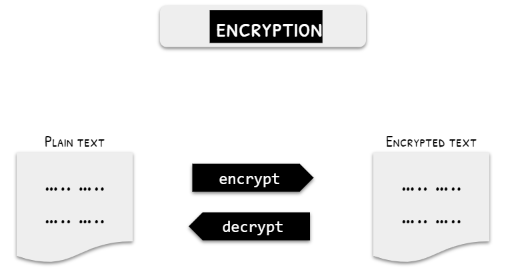
</div>

<br>

However, even the key that can be used to encrypt the data could be compromised. So, passwords are stored using a different method called hashing. The key distinction between encryption and hashing is that hashing is an irreversible process. 

<br>

<div class="text-center">
    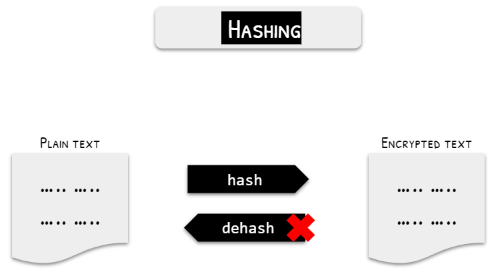
</div>

<br>

So, no matter even if the hacker gets a hold of the password used to hash the password, the original password cannot be retrieved. To add an additional layer of security, another process called <kbd>salting</kbd> is used wherein an additional text ( <kbd>salt</kbd> )can be added to the end of the password to make the process even more secure against brute force attacks. 

<hr>

<div class="alert alert-secondary" id="bcrypt-library">    
    <span class="topic"> &#10070; bcrypt Library</span>   
</div>

<kbd>bcrypt</kbd> is a hashing library that uses the <code>blowfish</code> algorithm to hash data. Python also has a built-in module called <kbd>crypto</kbd> which can be used to hash passwords. However, bcrypt is used most widely in the industry. In order to use it, let's install the package. 

<code> > pip install bcrypt </code>

In [15]:
import bcrypt

password = "password"
password = password.encode("utf-8")
hashed_password = bcrypt.hashpw(password, bcrypt.gensalt())

print (hashed_password)

b'$2b$12$oka6.HAKdNC5mpaxLH.esOt.ytbVI9sG75LOE3qIcb.P.PuKxHZ42'


<div class="text-center">
    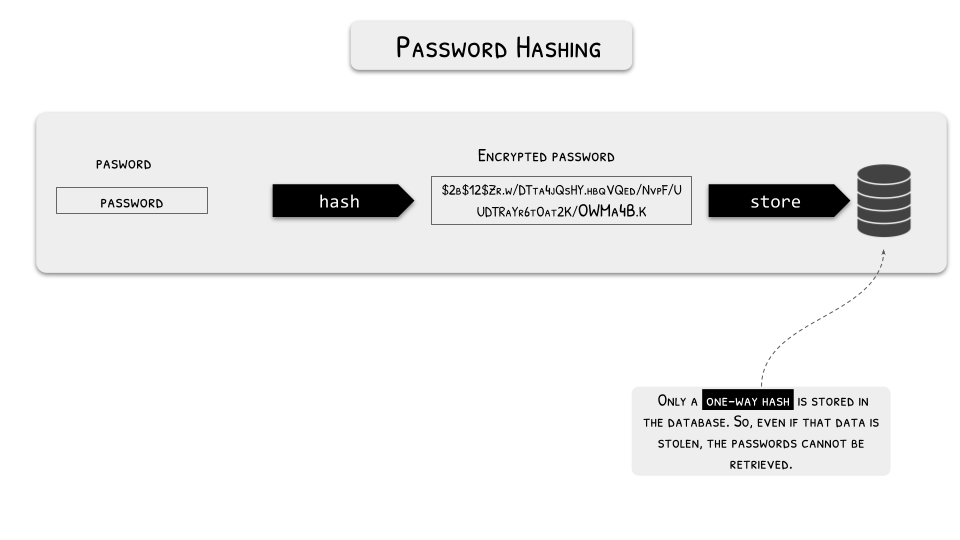
</div>

This hashing algorithm is actually quite interesting. Irrespective of the length of the password, the hash is always 60 characters. You can verify that like so. 

In [16]:
print (len(hashed_password))

60


Let's change the password and see if it holds true. 

In [23]:
password = "a very long password"
password = password.encode("utf-8")
hashed_password = bcrypt.hashpw(password, bcrypt.gensalt())

print (hashed_password)
print (len(hashed_password))

b'$2b$12$PijI3DNIhHVURS6R5BH2neQKws2qH9DiTI5Kjl1wBvTScbppzbW6m'
60


As you can see, the hash is always 60 chars long. Like discussed before, the hash cannot be reverse-engineered. So, how do we verify the password ? <kbd>bcrypt</kbd> provides us methods to verify the password like so.

In [26]:
password_to_verify = "a very long password"
password_to_verify = password_to_verify.encode("utf-8")

verify = bcrypt.checkpw(password_to_verify, hashed_password)

print (verify)

True


Here is a visual of the password matching.

<div class="text-center">
    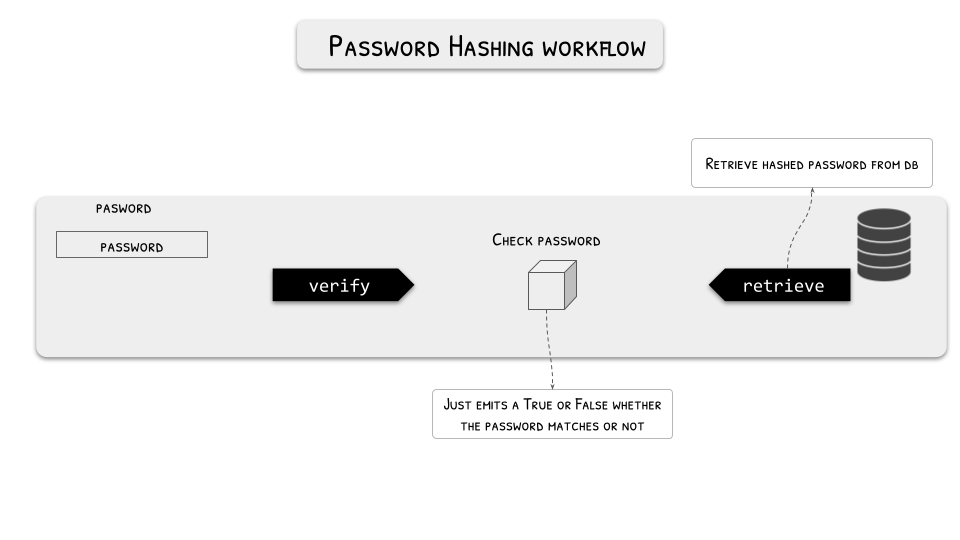
</div>

Note that the passwords are not reconstructed or retrieved in the algorithm. The unhashed password is hashed using the same salt that was used to hash the original password. 

Owing to the limitation of compressing the hashed output to 60 chars only, the input text is limited to 72 bytes. This means that the password cannot be unlimited in length. 

<hr>

<div class="alert alert-secondary" id="Store-Encrypted-Passwords">    
    <span class="topic"> &#10070; Store Encrypted Passwords</span>   
</div>

Now that we know how to encrypt and decrypt the passwords, let's rewrite the program to store encrypted passwords.

In [ ]:
import getpass
import sqlite3
import bcrypt

# Create database if it does not exist.
# Otherwise get a connection to the databse
try:
    conn = sqlite3.connect("users.db")
    
    # Create table. 
    cursor = conn.execute('''CREATE TABLE users (
                                user_id  VARCHAR(20),
                                password VARCHAR(100))''')
except Exception as e:
    # If table already exists, don't exit. 
    # Proceed to the loop 
    if (str(e) == "table users already exists"):
        pass
    # If table could not be created, something wrong
    # with database. Quit
    else:
        print("Could not create table")
        print(e)
        conn.close()
        quit()


while True:
    try:
        print("#################################################")
        print("#   1 - Login")
        print("#   2 - Signup")
        print("#   3 - Exit")
        print("#################################################")
        user_input = input("Enter option -> ")
        user_input = str(user_input)
        if user_input == "3":
            break
        elif user_input == "1":
            user_id = input("User id : ")
            password_to_verify = getpass.getpass(prompt="Password :")
            cursor = conn.execute('''SELECT * FROM users
                            WHERE user_id = ?''', [user_id])
            # no execution happens until this is called or the cursor is iterated over
            row = cursor.fetchone()
            if row == None:
                print("user id does not exist.")
            else:
                password_to_verify = password_to_verify.encode("utf-8")
                verify = bcrypt.checkpw(password_to_verify, row[1])
                if verify:
                    print("logged in")
                else:
                    print("password mismatch")

            # Check if the user id exists

        elif user_input == "2":
            user_id = input("User id : ")
            password = getpass.getpass(prompt="Password :")
            password_repeat = getpass.getpass(prompt="Repeat Password :")
            if password != password_repeat:
                print("Passwords do not match")
            else:
                try:
                    # Create new user
                    # step 1 - check if the user already exists
                    cursor = conn.execute('''SELECT * FROM users
                                             WHERE user_id = ?''', [user_id])

                    # no execution happens until this is called or the cursor is iterated over
                    row = cursor.fetchone()

                    # step 2 - if the user already exists, send message
                    if row != None:
                        print("user id already exists. Choose a different user id")

                    # step 3 - create user
                    else:
                        # encrypt password
                        ## encode the password
                        password = password.encode("utf-8")
                        ## hash the password
                        hashed_password = bcrypt.hashpw(password, bcrypt.gensalt())
                        cursor = conn.execute('''INSERT INTO users (user_id, password) 
                                                    VALUES (?,?)''', [user_id, hashed_password])
                        conn.commit()
                        print(f"user {user_id} created ")
                except Exception as e:
                    print(e)
    except Exception as e:
        print(e)

# Close the connection after the program is done.
conn.close()


Could not create table
table users already exists
#################################################
#   1 - Login
#   2 - Signup
#   3 - Exit
#################################################


Enter option ->  2
User id :  john
Password : ········
Repeat Password : ········


user john created 
#################################################
#   1 - Login
#   2 - Signup
#   3 - Exit
#################################################


Enter option ->  1
User id :  john
Password : ········


logged in
#################################################
#   1 - Login
#   2 - Signup
#   3 - Exit
#################################################
